<b>Exercise 6.7:</b>

Next, Charlie prepares the spins in a different state, called |T1⟩, where

|T1⟩ = (1/√2)(|ud⟩+|du⟩)

In these examples, T stands for triplet. These triplet states are completely different from the states in the coin and die examples. What are the expectation values of the operators σzτz,σxτx, and σyτy?
What a difference a sign can make!

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$
Next, Charlie prepares the spins in a different states:

$\ket{T_{1}} = \frac{1}{\sqrt{2}}({\ket{01} + \ket{10}})$

$\ket{T_{2}} = \frac{1}{\sqrt{2}}({\ket{11} - \ket{00}})$

$\ket{T_{3}} =\frac{1}{\sqrt{2}}({\ket{11} + \ket{00}})$

In these examples, T stands for triplet. These triplet states
are completely different from the states in the coin and die
examples. What are the expectation values of the operators
$σ_{z}τ_{z}$, $σ_{x}τ_{x}$, and $ σ_{y}τ_{y}$?


In [1]:
import numpy as np
from copy import *
from qiskit import *
from qiskit.visualization import plot_histogram, iplot_state_city
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from math import *

In [2]:
def stater(qc):
    backend_sim = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend_sim).result()
    state = result.get_statevector(qc)
    #print(state)
    return state

In [3]:
# create a circuit with two qubits
a = QuantumRegister(1, 'a')
b = QuantumRegister(1, 'b')
qc = QuantumCircuit(a,b)

The following code lists out the different gates used in the circuit to connect them in a triplet state.

The simulator represents the four values of a given state vector and so we can see how the matrix of values would change after each new gate is added.

Possibilities represents the classical bits that could result after each new gate is added.

In [4]:
print('Original:')
stater(qc)
# insert a x gate on qubit a
qc.x(a)
print(1)
print(stater(qc))
## simulator: 0100
# insert a h gate on qubit b
qc.h(b)
print(2)
print(stater(qc))
## simulator: 0(0.7)0(0.7)
## at this point qubit a is guaranteed to be 1
## and qubit b can be either 0 or 1
## possibilities: 11,10
# insert a cx gate from qubit b to a
qc.cx(b,a)
print('State Vector:')
## simulator: 0(0.7)(0.7)0
## at this point qubit a can be either 0 or 1
## and qubit b can be either 1 or 0 depending on qubit a
## possibilities: 01,10
print(stater(qc))
tripState = stater(qc)

Original:
1
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
2
[0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]
State Vector:
[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


In [5]:
iplot_state_city(tripState)

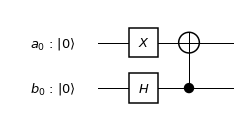

In [6]:
qc.draw(output='mpl')
# this is a maximally entangled system in a triplet state (T1)

[[ 0.   +0.j  0.707+0.j  0.   +0.j  0.707+0.j]
 [ 0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]
 [ 0.707+0.j  0.   +0.j -0.707+0.j  0.   +0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j -0.707+0.j]]


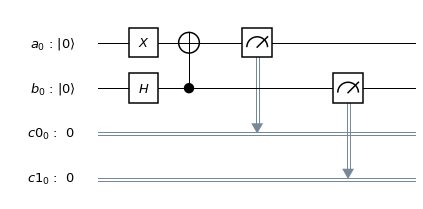

In [7]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))
c0 = ClassicalRegister(1, 'c0')
c1 = ClassicalRegister(1, 'c1')
meas = QuantumCircuit(a,b,c0,c1)
meas.draw(output='mpl')
meas.measure(a,c0)
meas.measure(b,c1)
circ = qc+meas
circ.draw(output='mpl')

In [8]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
# there are always only two solutions: 10 and 01

{'1 0': 510, '0 1': 514}


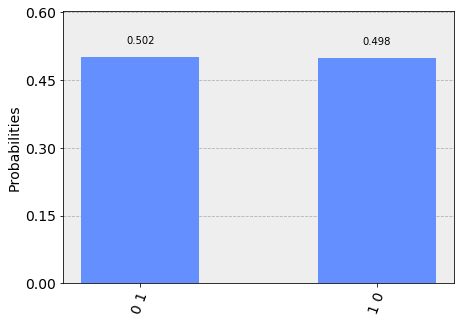

In [9]:
plot_histogram(counts)

In [10]:
def expectationValue(qc):
    psi = stater(qc)
    
    a = QuantumRegister(2)
    b = ClassicalRegister(2)
    
    # create a duplicate circuit flipped around the x axis (conjugate of the original)    
    circX = deepcopy(qc)
    circX.x(0)
    circX.x(1)

    # create a duplicate circuit flipped around the y axis (conjugate of the original)
    circY = deepcopy(qc)
    circY.y(0)
    circY.y(1) 
    
    # create a duplicate circuit flipped around the z axis (conjugate of the original)
    circZ = deepcopy(qc)
    circZ.z(0)
    circZ.z(1)
    
    # the expectation value can be represented by 0.5(T1)(conjugate of T1)
    # this can be expressed using matrix multiplication as well
    # take the transpose of the original circuit's state vector and multiply it by the complex conjugate
    print('Expectation Value X:', (np.transpose(psi)@stater(circX)).round(1))
    print('Expectation Value Y:', (np.transpose(psi)@stater(circY)).round(1))
    print('Expectation Value Z:', (np.transpose(psi)@stater(circZ)).round(1))

In [11]:
expectationValue(qc)

Expectation Value X: (1+0j)
Expectation Value Y: (1+0j)
Expectation Value Z: (-1+0j)
